In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/hotel_bookings.csv')
df.columns, df.shape

(Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
        'company', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date'],
       dtype='object'),
 (119390, 32))

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
print(df['hotel'].unique())
print(df['meal'].unique())
print(df['distribution_channel'].unique())
print(df['reserved_room_type'].unique())
print(df['customer_type'].unique())
print(df['deposit_type'].unique())
print(df['reservation_status'].unique())
print(df['market_segment'].unique())

['Resort Hotel' 'City Hotel']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
['Transient' 'Contract' 'Transient-Party' 'Group']
['No Deposit' 'Refundable' 'Non Refund']
['Check-Out' 'Canceled' 'No-Show']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df = df.drop(['company','agent'],axis=1)
df = df.dropna()

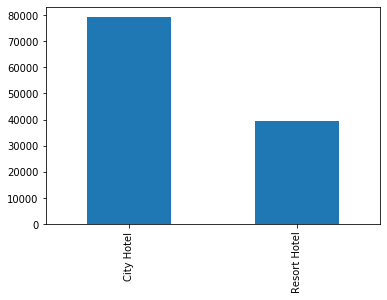

In [8]:
df['hotel'].value_counts().plot.bar()

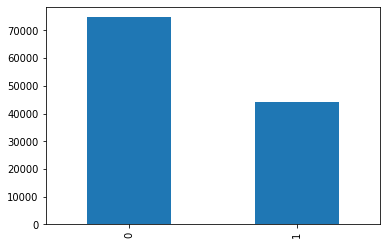

In [9]:
df['is_canceled'].value_counts().plot.bar()

In [10]:
pd.crosstab(df['hotel'],df['is_repeated_guest'])

is_repeated_guest,0,1
hotel,,
City Hotel,77270,2032
Resort Hotel,37822,1774


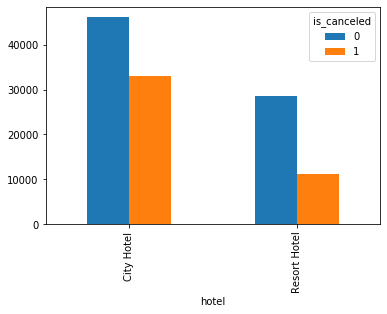

In [11]:
pd.crosstab(df['hotel'],df['is_canceled']).plot.bar()

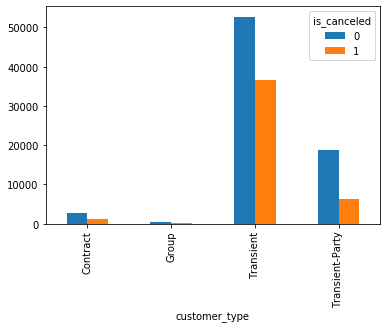

In [12]:
pd.crosstab(df['customer_type'],df['is_canceled']).plot.bar()

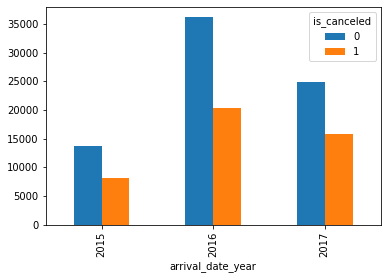

In [13]:
pd.crosstab(df['arrival_date_year'],df['is_canceled']).plot.bar()

In [14]:
pd.crosstab(df['reserved_room_type'],df['assigned_room_type'])

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,73408,1123,1426,7415,1124,410,182,92,211,210,0,0
B,111,984,0,5,2,2,8,0,0,2,0,0
C,5,2,883,6,4,2,10,10,9,0,0,0
D,312,27,34,17714,683,202,81,9,67,44,0,0
E,15,3,8,21,5890,401,100,4,39,16,0,0
F,6,17,0,4,31,2701,116,2,10,3,0,0
G,5,2,2,0,4,13,2032,6,15,4,0,0
H,0,0,0,1,0,0,10,584,6,0,0,0
L,1,1,1,0,0,1,0,1,0,0,1,0


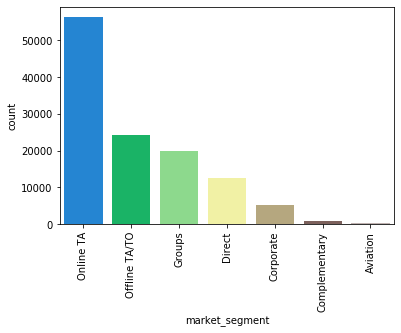

In [15]:
#df['market_segment'].value_counts().plot.bar()
sns.countplot(x='market_segment', data=df, palette='terrain', order=df['market_segment'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

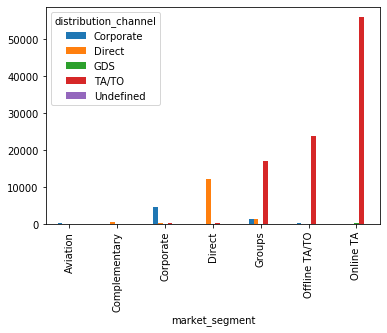

In [16]:
pd.crosstab(df['market_segment'],df['distribution_channel']).plot.bar()

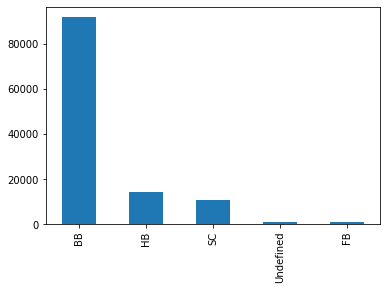

In [17]:
df['meal'].value_counts().plot.bar()

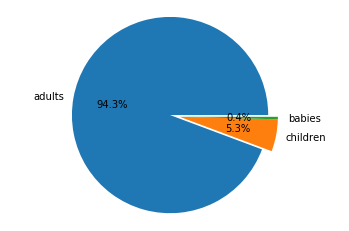

In [18]:
#df[['adults','children','babies']].mean().plot.bar()

labels = ['adults', 'children', 'babies']
sizes = [df['adults'].mean(), df['children'].mean(), df['babies'].mean()]
separated = (.1,0,0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=separated)
plt.axis('equal')
plt.show()

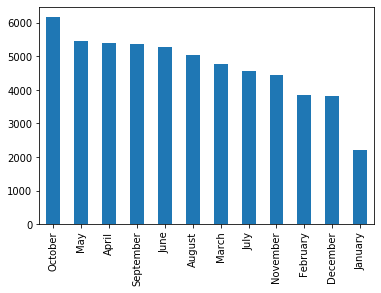

In [19]:
yr_2016 = df.loc[df['arrival_date_year'] == 2016]
month_unique = yr_2016['arrival_date_month'].value_counts().plot.bar()

In [20]:
df.select_dtypes('number').skew().sort_values(ascending=False)

babies                            24.701477
previous_cancellations            24.425277
previous_bookings_not_canceled    24.036749
adults                            18.459143
days_in_waiting_list              11.919380
adr                               10.599418
booking_changes                    6.005337
is_repeated_guest                  5.317274
required_car_parking_spaces        4.195564
children                           4.105568
stays_in_week_nights               2.697714
total_of_special_requests          1.346720
lead_time                          1.344423
stays_in_weekend_nights            1.298362
is_canceled                        0.532528
arrival_date_day_of_month         -0.002526
arrival_date_week_number          -0.009920
arrival_date_year                 -0.234359
dtype: float64

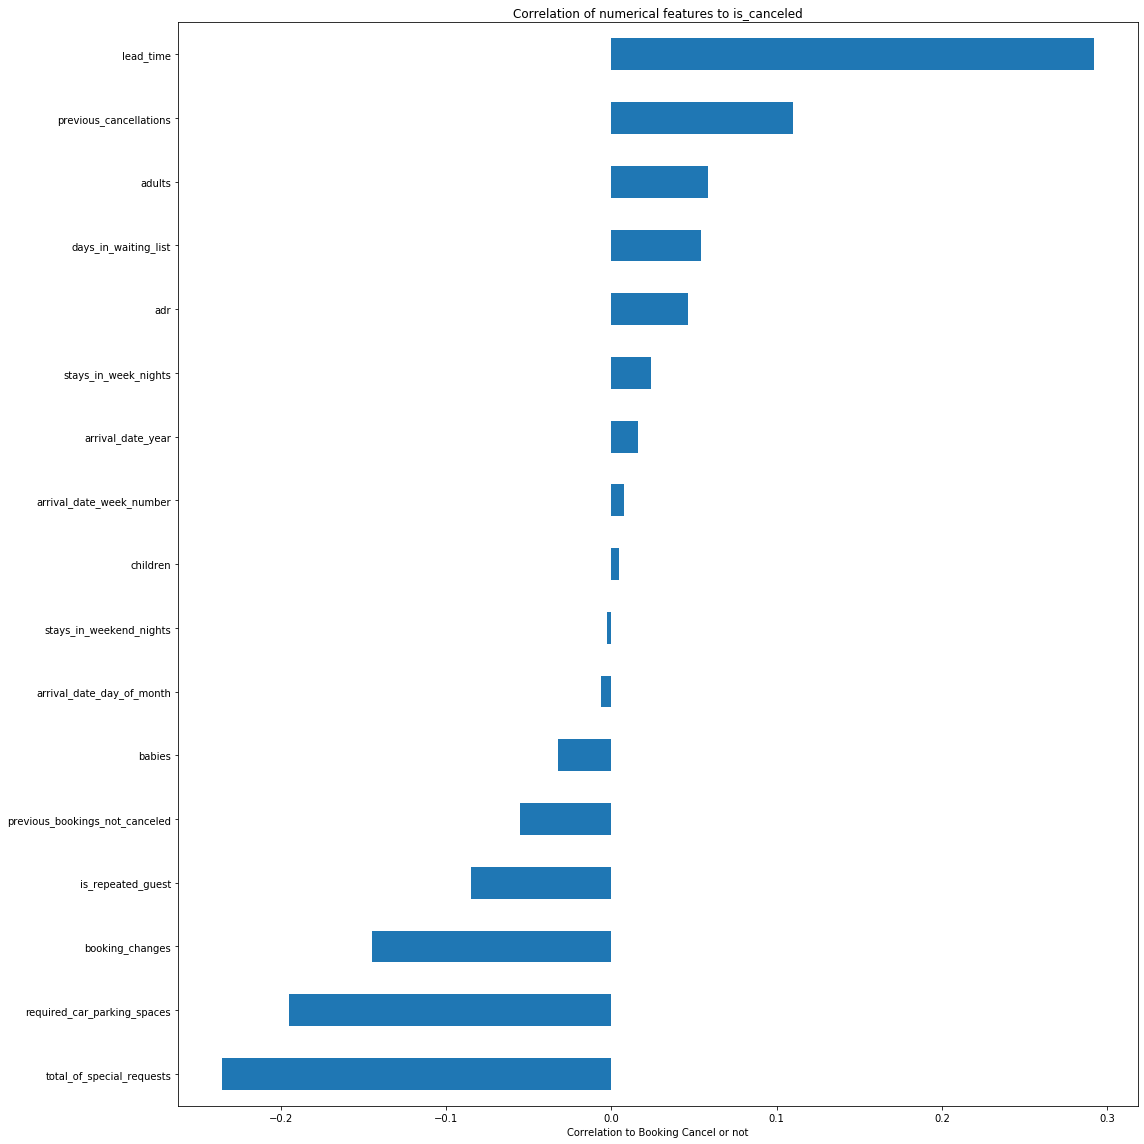

In [21]:
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(16,16));
corr["is_canceled"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to is_canceled")
plt.xlabel("Correlation to Booking Cancel or not")
plt.tight_layout()
plt.show()

In [64]:
year_group = df.groupby('arrival_date_year')
temp_df = year_group.get_group(2015)
month_group = temp_df.groupby('arrival_date_month')
temp_df = month_group.get_group('July')
temp_df = temp_df.loc[[x for x in temp_df['is_canceled'] if x == 0]]
temp_df.shape

(1504, 30)